In [24]:
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Overview

In [25]:
# read csv file
df_netflix = pd.read_csv('./datasets/netflix_titles.csv')

In [26]:
# data types
df_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [27]:
# shape of dataframe
df_netflix.shape

(8807, 12)

### Identifying Missing Data

In [28]:
# number of rows missing in each column
df_netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [29]:
# % of rows missing in each column
for column in df_netflix.columns:
    percentage = df_netflix[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
release_year: 0.0%
rating: 0.05%
duration: 0.03%
listed_in: 0.0%
description: 0.0%


### Dealing with missing data

In [30]:
# Remove a column or row with .drop, .dropna or .isnull

# drop column
# df_netflix.drop('director', axis=1)
# drop row
no_director = df_netflix[df_netflix['director'].isnull()].index
df_netflix.drop(no_director, axis=0)
# drop row
# no_duration = df_netflix[df_netflix['duration'].isnull()].index
# df_netflix.drop(no_duration, axis=0, inplace=True)

# ~ + .isnull()
# df_netflix[~df_netflix['director'].isnull()]

# dropna()
# df_netflix.dropna(subset=['director'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [31]:
# Replace it by the mean, median (numeric data) or mode (categorical data)
df_netflix[df_netflix['rating'].isnull()]
mode = ''.join(df_netflix['rating'].mode())
df_netflix['rating'].fillna(mode, inplace=True)

In [32]:
df_netflix[df_netflix['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [33]:
df_netflix.loc[5541]

show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
release_year                                                 2017
rating                                                     74 min
duration                                                      NaN
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 5541, dtype: object

In [34]:
# Replace it by an arbitrary number with .fillna()
df_netflix['duration'].fillna('0', inplace=True)

# backward, forward 
# df.fillna(method='bfill')
# df.fillna(method='ffill')

In [35]:
# Extracting data from a "duration" column with split() and extract() methods
df_movie = df_netflix[df_netflix['type'] == 'Movie']
df_movie['minit'] = df_movie['duration'].str.split(expand=True)[0].astype(int)

c:\ProgramData\anaconda3\envs\NatureInspierdAlgorithm\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Identifying Outliers

#### Using histrogram to identify outliers withing a niumerical data

Text(0.5, 1.0, 'Duration of Movies on Netflix')

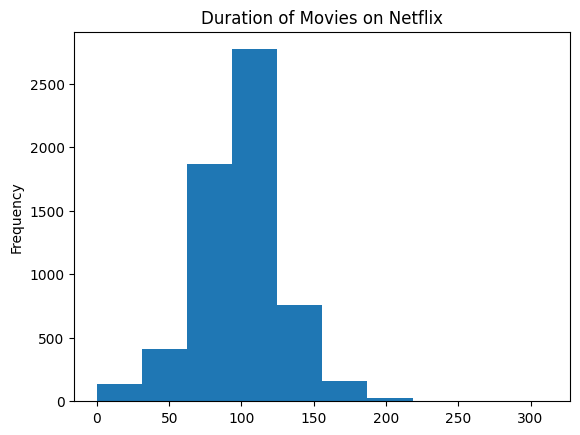

In [36]:
# Maka a histogram with a pandas
df_movie['minit'].plot(kind='hist', bins=10)
plt.title('Duration of Movies on Netflix')

In [37]:
# Get bar range with .value_counts() and number of bins
df_movie['minit'].value_counts(bins=10).sort_index()

(-0.313, 31.2]     135
(31.2, 62.4]       410
(62.4, 93.6]      1867
(93.6, 124.8]     2772
(124.8, 156.0]     766
(156.0, 187.2]     150
(187.2, 218.4]      22
(218.4, 249.6]       6
(249.6, 280.8]       2
(280.8, 312.0]       1
Name: minit, dtype: int64

In [38]:
# Dealing with outliers
df_movie[(df_movie['minit'] > 31) & (df_movie['minit'] < 200)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


#### Using boxplot to identify outliers within numeric data

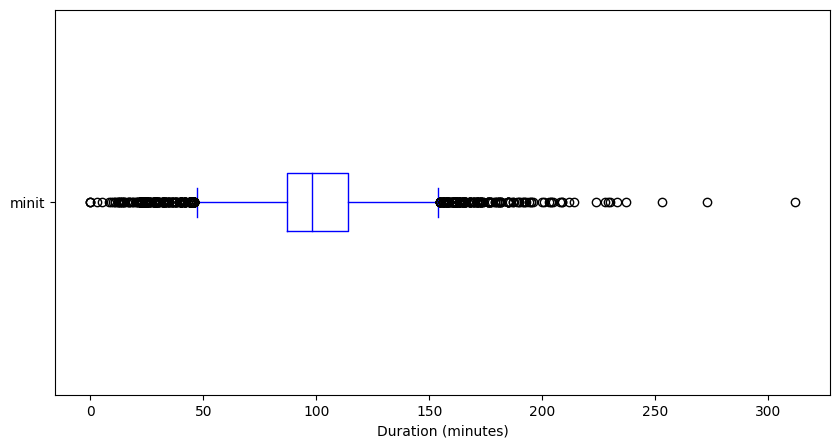

In [43]:
# make a boxplot with pandas
df_movie['minit'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('Duration (minutes)')
plt.show()

In [46]:
# overview descriptive statitics
# IQR = Q3-Q1
min_boxplot = 87 - 1.5*(114 - 87) # Q1 - 1.5*IQR
max_boxplot = 114 + 1.5*(114 - 87) # Q3 + 1.5*IQR

print(df_movie['minit'].describe())
print(min_boxplot)
print(max_boxplot)

count    6131.000000
mean       99.528462
std        28.369284
min         0.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: minit, dtype: float64
46.5
154.5


#### Using bars to identify outliers within categorical data

<AxesSubplot:>

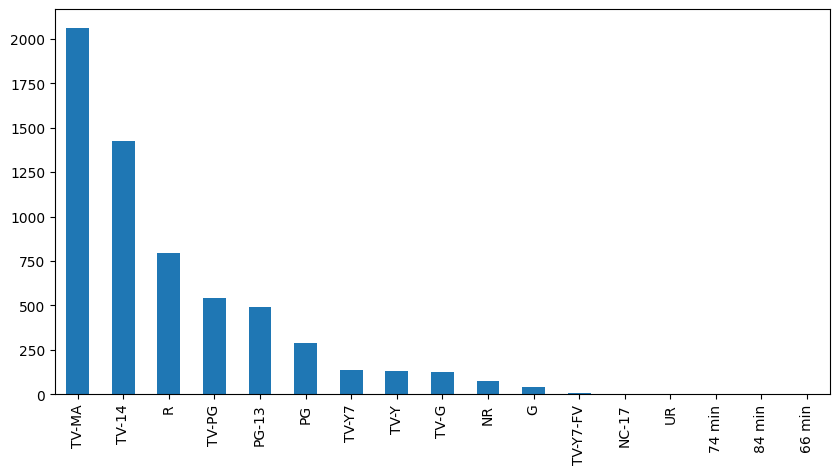

In [47]:
# make barplot with pandas
df_movie['rating'].value_counts().plot(kind='bar', figsize=(10,5))

### Text Normalization

#### Dealing with inconsistent capitalization: lower(), upper(), title()

In [48]:
# change the case of text with the str attribute
df_movie['title'].str.lower()
df_movie['title'].str.upper()
df_movie['title'].str.title()

# update values
df_movie['title'] = df_movie['title'].str.upper()

# change the case of text with the apply method
df_movie['title'].apply(lambda x:x.lower())

c:\ProgramData\anaconda3\envs\NatureInspierdAlgorithm\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0                   dick johnson is dead
6       my little pony: a new generation
7                                sankofa
9                           the starling
12                          je suis karl
                      ...               
8801                             zinzana
8802                              zodiac
8804                          zombieland
8805                                zoom
8806                              zubaan
Name: title, Length: 6131, dtype: object

#### Remove blank spaces with strip(), lstrip(), and rstrip()

In [49]:
# how the strip method workds
movie_title = " Titanic    "

# trim leading space with lstrip()
print(movie_title.lstrip())
# trim trailing space with rstrip()
print(movie_title.rstrip())
# trim leading and trailing space with strip()
print(movie_title.strip())

Titanic    
 Titanic
Titanic


In [50]:
# get rid of leading and trailing white spaces with the strip() method
df_movie['title'] = df_movie['title'].str.strip()

# get rid of leading and trailing white spaces with the apply method
df_movie['title'].apply(lambda x:x.strip())

c:\ProgramData\anaconda3\envs\NatureInspierdAlgorithm\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0                   DICK JOHNSON IS DEAD
6       MY LITTLE PONY: A NEW GENERATION
7                                SANKOFA
9                           THE STARLING
12                          JE SUIS KARL
                      ...               
8801                             ZINZANA
8802                              ZODIAC
8804                          ZOMBIELAND
8805                                ZOOM
8806                              ZUBAAN
Name: title, Length: 6131, dtype: object

#### Replace strings with replace() or sub()

In [51]:
# remove punctuation signs with the str.replace() method and regex
df_movie['title'].str.replace('[^\w\s]', '', regex=True)

# remove punctuation signs with the replace() method and regex
df_movie['title'].replace('[^\w\s]', '', regex=True)

# difference between str.replace() and replace()
# str.replace(): perform string or regex substitution on string data.
# replace():  can replace any type of data

# df_movie['title'].replace(1, 2, regex=True)
# df_movie['title'].str.replace(1, 2, regex=True)

# remove punctuation signs with the re.sub() function via teh apply method
# import re
# df_movie['title'].apply(lambda x:re.sub('[^\w\s]','',x))

0                  DICK JOHNSON IS DEAD
6       MY LITTLE PONY A NEW GENERATION
7                               SANKOFA
9                          THE STARLING
12                         JE SUIS KARL
                     ...               
8801                            ZINZANA
8802                             ZODIAC
8804                         ZOMBIELAND
8805                               ZOOM
8806                             ZUBAAN
Name: title, Length: 6131, dtype: object